In [2]:
%%capture

from plotnine import *
from plotnine_prism import *

from nb_helpers import ToothGrowth, plot_grid

In [3]:
base = (
    ggplot(ToothGrowth, aes(x = "dose", y = "len")) + 
    geom_violin(aes(colour = "dose", fill = "dose"), trim = False) + 
    geom_boxplot(aes(fill = "dose"), width = 0.2, colour = "black") 
)

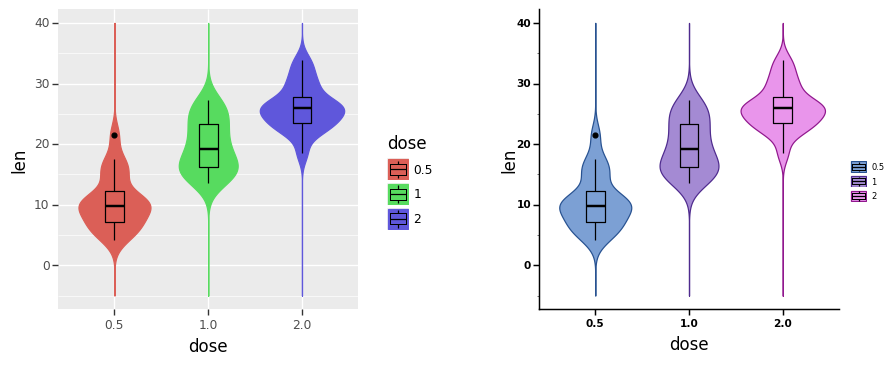

In [4]:
p1 = base + ylim(-5, 40)
p2 = (
    base + 
    scale_y_continuous(limits=[-5, 40], guide=guide_prism_offset_minor()) +
    scale_color_prism('floral') +
    scale_fill_prism('floral') +
    theme_prism() 
)
plot_grid(p1, p2)